In [1]:
!pip install astropy

In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

### **Estrella de Carbón**

In [11]:
filename = 'template-star-Carbon.fits'
hdul = fits.open(filename)

# Print out the FITS file structure
hdul.info()

Filename: rrtemplate-star-Carbon.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  BASIS_VECTORS    1 PrimaryHDU      15   (5933, 1)   float32   


In [12]:
data = hdul[0].data
header = hdul[0].header

print(data)
print(repr(header))

[[0.05920321 0.05920321 0.05920321 ... 1.2812172  1.2812172  1.2812172 ]]
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5933                                                  
NAXIS2  =                    1                                                  
CRVAL1  =               3.4842                                                  
CDELT1  =               0.0001                                                  
LOGLAM  =                    1                                                  
RRTYPE  = 'STAR    '                                                            
RRSUBTYP= 'Carbon  '                                                            
SDSSNAME= 'Carbon  '           / Orig NAMEnn keyword                            
RRVER   = '0.8.0.dev343'           

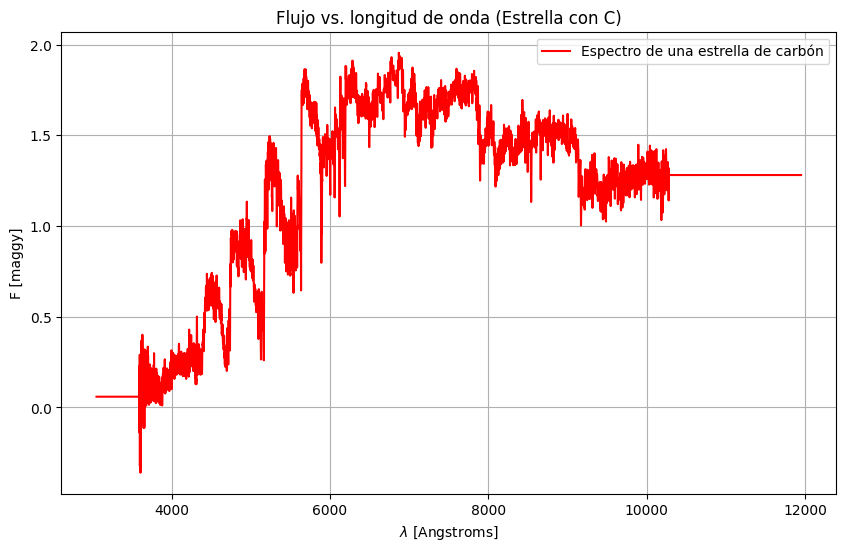

In [15]:
flux = data[0]

start_log_wavelength = header['CRVAL1']  # Logarithmic starting wavelength
delta_log_wavelength = header['CDELT1']  # Logarithmic step size
log_wavelengths = start_log_wavelength + delta_log_wavelength * np.arange(len(flux))

wavelengths = 10 ** log_wavelengths


plt.figure(figsize=(10, 6))
plt.plot(wavelengths, flux, color= 'red', label='Espectro de una estrella de carbón')
plt.xlabel('$\lambda$ [Angstroms]')
plt.ylabel('F [maggy]')
plt.title('Flujo vs. longitud de onda (Estrella con C)')
plt.grid(True)
plt.legend()
plt.show()

### **Espectro de QSO**

In [17]:
filename = 'template-qso.fits'
hdul = fits.open(filename)

hdul.info()

Filename: rrtemplate-qso.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  BASIS_VECTORS    1 PrimaryHDU      13   (13637, 4)   float32   


In [19]:
data = hdul[0].data
header = hdul[0].header

print(data)
print(repr(header))

[[13003.001    13003.001    13003.001    ...   253.14291    253.14291
    253.14291 ]
 [-2809.8818   -2809.8818   -2809.8818   ...   334.35114    334.35114
    334.35114 ]
 [-1167.5288   -1167.5288   -1167.5288   ...   103.79632    103.79632
    103.79632 ]
 [  623.7448     623.7448     623.7448   ...   -49.112606   -49.112606
    -49.112606]]
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                13637                                                  
NAXIS2  =                    4                                                  
CRVAL1  =               2.6534 / restframe starting wavelength [Angstroms]      
CDELT1  =               0.0001                                                  
LOGLAM  =                    1 / wavelength grid sampled in log(lambda)         
RRTYPE

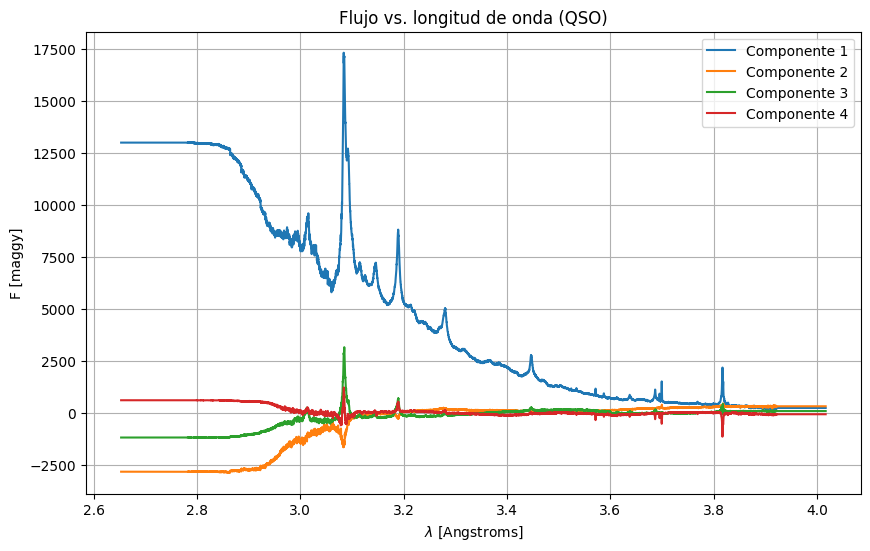

In [20]:
n_pixels = data.shape[1]  # NAXIS1 = 13637, the number of wavelength points
n_components = data.shape[0]  # NAXIS2 = 4, the number of spectra or flux components

start_wavelength = header['CRVAL1']
delta_wavelength = header['CDELT1']
wavelengths = start_wavelength + delta_wavelength * np.arange(n_pixels)


plt.figure(figsize=(10, 6))
for i in range(n_components):
    plt.plot(wavelengths, data[i], label=f'Componente {i+1}')
plt.xlabel('$\lambda$ [Angstroms]')
plt.ylabel('F [maggy]')
plt.title('Flujo vs. longitud de onda (QSO)')
plt.legend()
plt.grid(True)
plt.show()

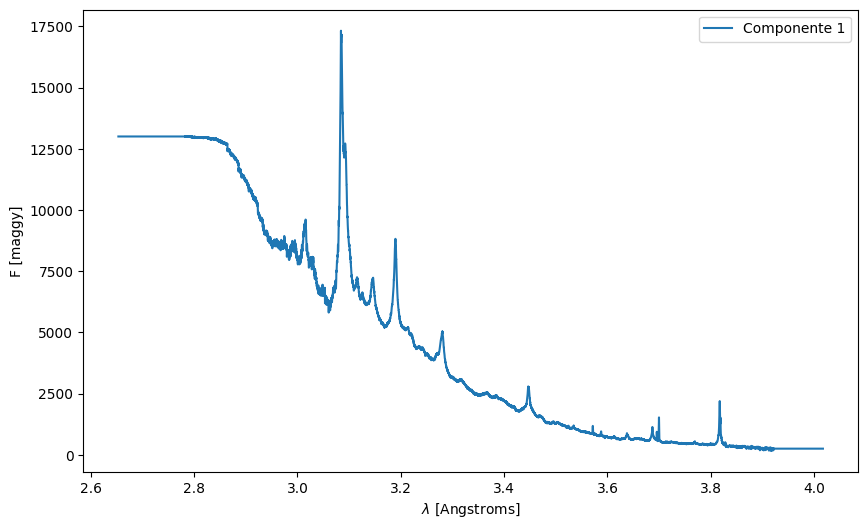

In [21]:
plt.figure(figsize=(10, 6))

plt.plot(wavelengths, data[0], label=f'Componente 1')
plt.xlabel('$\lambda$ [Angstroms]')
plt.ylabel('F [maggy]')
plt.legend()
plt.show()

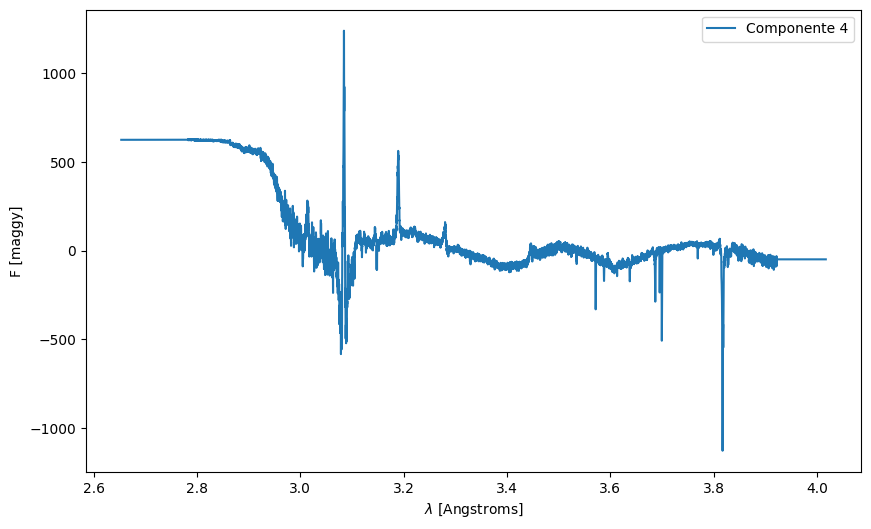

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(wavelengths, data[3], label=f'Componente 4')
plt.xlabel('$\lambda$ [Angstroms]')
plt.ylabel('F [maggy]')
plt.legend()
#plt.grid(True)
plt.show()